## Introduction:

Suppose you and your classmates compute the percentile rank of your birth weights and then compute the CDF of the percentile ranks. 

What do you expect it to look like? 

Hint: what fraction of the class do you expect to be above the median?

## Answer:

1. The CDF and Percentile rank values expected to be the same .. 
As: CDF is exactly equals to the percentile rank except that CDF is a fractional value however, percentile rank is a percentage value .. 

2. The distribution of the class weights expected to be normal .. i.e. 50% of the class weights have to be above the median value .. 

Let's prove those answers above .. using the pregnencies dataset .. however, let's work on the whole column representing babies weights .. without dividing it to first_babies and others ..  

In [2]:
import Cdf
import Pmf
import numpy as np
import random 
import score_example
import itertools
# import pandas as pd
import survey
import first
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [4]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7f22a4628f10>,
 <survey.Pregnancies at 0x7f22a4628f50>)

In [5]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7f22951e4490>,
 <survey.Pregnancies at 0x7f2283608390>)

In [6]:
len(original_table), len(firsts_table) + len(others_table)

(13593, 9148)

As agreed earlier I gonna work on the whole column of weights .. and it makes more sense to work on the sum of first and others not on the whole table .. which means that we gonna concat the weight column for firsts and others as it implies that these are only alive babies .. however, the whol column contains both alive and non alive babies .. 

In [7]:
first_baby_ = np.zeros([len(firsts_table.records), 1])

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_[i] = firsts_table.records[i].birthwgt_oz
    except ValueError:
        first_baby_[i] = 0
len(first_baby_)

4413

In [8]:
others_baby_ = np.zeros([len(others_table.records), 1])

for i in xrange(len(others_table.records)):
    try:
        others_baby_[i] = others_table.records[i].birthwgt_oz
    except ValueError:
        others_baby_[i] = 0
len(others_baby_)

4735

In [9]:
babies_weights_oz = np.append(first_baby_, others_baby_)
np.size(babies_weights_oz)   ## reference has to be added (the website link)
babies_weights_oz

array([ 13.,   2.,   9., ...,   0.,   8.,   8.])

In [12]:
## let's calc the percentile rank .. 

def Percentile_Rank(weigths, your_weight):
    count = 0
    
    for weight in weigths:
        if weight <= your_weight:
            count += 1

    percentile_rank = 100.0 * count / len(weigths)
    
    return percentile_rank

In [14]:
my_weight = int(random.choice(babies_weights_oz))
perc_rank = Percentile_Rank(babies_weights_oz, my_weight)
perc_rank  

23.05421950153039

Note that this is read as a % .. i.e. 99.7% of the population have weights lower than mine .. 

Now, let's calculate the CDF .. 

In [15]:
merged = list(itertools.chain(*[babies_weights_oz]))
len(merged)

9148

In [16]:
cdf_babies = Cdf.MakeCdfFromList(merged)
cdf_babies

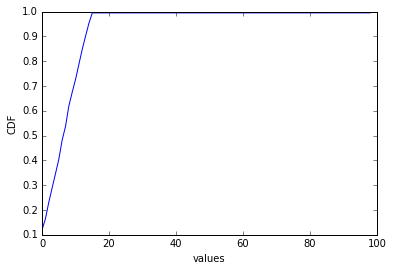

In [17]:
plt.plot(cdf_babies.xs, cdf_babies.ps)
plt.xlabel('values')
plt.ylabel('CDF')

In [18]:
cdf_babies.Items()

[(0.0, 0.120026235242676),
 (1.0, 0.16462614779186707),
 (2.0, 0.2305421950153039),
 (3.0, 0.28880629645824224),
 (4.0, 0.34619588981198074),
 (5.0, 0.40467861827721907),
 (6.0, 0.48218189768255354),
 (7.0, 0.5369479667686926),
 (8.0, 0.619588981198076),
 (9.0, 0.6747923043288151),
 (10.0, 0.7267162221250547),
 (11.0, 0.7876038478355925),
 (12.0, 0.8482728465238304),
 (13.0, 0.9015085264538697),
 (14.0, 0.9534324442501093),
 (15.0, 0.994752951464801),
 (97.0, 0.994862264975951),
 (98.0, 0.994971578487101),
 (99.0, 1.0)]

These values related to CDF are fractions and have to sum to 1

### 2. Disrtibution of the class:

As proved in the earlier exercises .. PMF is more suitable than CDF in case the distribution of the discrete data has to be shown  .. hence, let's plot PMF for the above babies weights .. 

In [19]:
pmf_babies = Pmf.MakePmfFromList(merged)
pmf_babies.Items()

[(0.0, 0.120026235242676),
 (1.0, 0.04459991254919108),
 (2.0, 0.06591604722343682),
 (3.0, 0.05826410144293835),
 (4.0, 0.05738959335373852),
 (5.0, 0.058482728465238304),
 (6.0, 0.0775032794053345),
 (7.0, 0.05476606908613905),
 (8.0, 0.08264101442938347),
 (9.0, 0.05520332313073896),
 (10.0, 0.051923917796239616),
 (11.0, 0.060887625710537824),
 (12.0, 0.06066899868823787),
 (13.0, 0.05323567993003935),
 (14.0, 0.051923917796239616),
 (15.0, 0.041320507214691736),
 (97.0, 0.00010931351114997814),
 (98.0, 0.00010931351114997814),
 (99.0, 0.005028421512898994)]

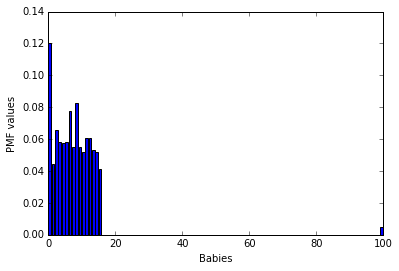

In [20]:
plt.bar(pmf_babies.d.keys(), pmf_babies.d.values()) 
plt.xlabel('Babies')
plt.ylabel('PMF values')

not as expected ! :S .. 

I expected them to be normal .. however , this is not a perfectly normal curve although it is not skewed as well .. 

May be becuase the data are clustered below 20 .. and we already have an outlier at point 100 ..

### Let's prove it mathematically .. 

In [25]:
np.mean(babies_weights_oz), np.median(babies_weights_oz)

(7.3545037166593792, 7.0)

as proved graphically .. the data has a slight +ve skeweness as the mean value is a little bit higher than the median .. this might be becuase of the outlier value at 100 ! .. 

{'boxes': [<matplotlib.lines.Line2D at 0x7f22832ce810>],
 'caps': [<matplotlib.lines.Line2D at 0x7f22832db750>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f22832e5a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f22832e5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f22832cea10>,
  <matplotlib.lines.Line2D at 0x7f22832db110>]}

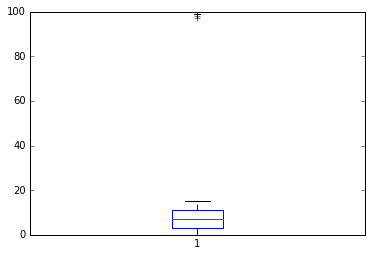

In [26]:
plt.boxplot(babies_weights_oz)

The boxplot clearly shows the extream point .. and proves the above conclusion ..